Coefficients: 
 [-1.05998404e-11 -9.15826211e-07 -4.21601121e-09  5.91989313e-08]
Mean squared error: 5416497.84
Absolute mean error: 1431.71


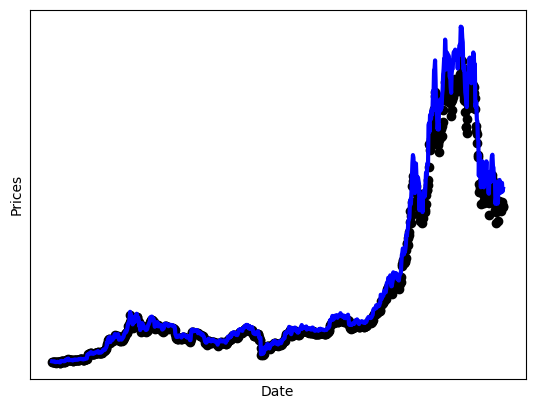

In [23]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def split(data, label, test_size):
    total=len(label)
    test_len=int(total*test_size)
    return data[:-test_len], data[-test_len:], label[:-test_len], label[-test_len:]

df = pd.read_excel("coin_Bitcoin.xlsx")
label = (df['Low'] + df['High']) / 2

# Converts date string column to python datetime type
# `infer_datetime_format=True` says method to guess date format from string
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

df.sort_values(by='Date')

# Coverts column in python datetime type to timestamp
df['Date'] = df['Date'].values.astype(np.int64) // 10 ** 9

df  = df.drop(['Low', 'High', 'Open', 'Close', 'Name', 'Symbol'], axis=1)

X_train, X_test, y_train, y_test = split(df, label, test_size=0.30)

regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

# predict the next two months
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The Absolute mean error
print("Absolute mean error: %.2f" % mean_absolute_error(y_test, y_pred))


# Plot outputs
plt.scatter(X_test['Date'], y_test, color="black")
plt.plot(X_test['Date'], y_pred, color="blue", linewidth=3)

plt.xlabel("Date")
plt.ylabel("Prices")
plt.xticks(())
plt.yticks(())

plt.show()